In [1]:
from keras.layers import Input,Dense
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Using TensorFlow backend.


In [2]:
import os
for dirPath, dirNames, fileNames in os.walk("figure"):
    pass
data=[]
for name in fileNames:
    path='figure/'+name
    img=mpimg.imread(path)
    data.append(img[:,:,0:3])
data=np.array(data)

x_train=data[:-50]
x_test=data[-50:]

x_train=x_train.reshape(len(x_train),40,40,3)
x_test=x_test.reshape(len(x_test),40,40,3)

print('x_train shape=',x_train.shape)
print('x_test shape=',x_test.shape)

x_train shape= (742, 40, 40, 3)
x_test shape= (50, 40, 40, 3)


In [3]:
hello=data.reshape(-1,3)
print(hello.shape)
hello=np.unique(hello, axis=0)
print(hello.shape)

(1267200, 3)
(20165, 3)


In [4]:
from sklearn.cluster import KMeans
abc=KMeans(100)
abc.fit(hello)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
print(abc.labels_)
hello

[22 67 89 ...,  0  0  0]


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.50196081,  0.41960785],
       [ 0.        ,  0.54901963,  0.80784315],
       ..., 
       [ 1.        ,  1.        ,  0.99215686],
       [ 1.        ,  1.        ,  0.99607843],
       [ 1.        ,  1.        ,  1.        ]], dtype=float32)

In [9]:
data_mod=data.reshape(-1,3)
data_mod=abc.predict(data_mod)
data_mod=data_mod.reshape(792,40,40,1)
#print(data_mod)

In [10]:
x_train=data_mod[:-50]
x_test=data_mod[-50:]

x_train=x_train.reshape(len(x_train),40,40,1)
x_test=x_test.reshape(len(x_test),40,40,1)

In [11]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img=Input(shape=(40,40,1))

x=Conv2D(8,(3,3),activation='relu',padding='same')(input_img)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(4,(3,3),activation='relu',padding='same')(x)
print(x.shape)
encoded=MaxPooling2D((5,5),padding='same')(x)
print(encoded.shape)

x=Conv2D(4,(3,3),activation='relu',padding='same')(encoded)
print(x.shape)
x=UpSampling2D((5,5))(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
print(decoded.shape)

(?, 40, 40, 8)
(?, 20, 20, 8)
(?, 20, 20, 8)
(?, 10, 10, 8)
(?, 10, 10, 4)
(?, 2, 2, 4)
(?, 2, 2, 4)
(?, 10, 10, 4)
(?, 10, 10, 8)
(?, 20, 20, 8)
(?, 20, 20, 8)
(?, 40, 40, 8)
(?, 40, 40, 1)


In [12]:
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=100,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Train on 742 samples, validate on 50 samples
Epoch 1/100
742/742 [==============================] - 4s - loss: -5.0721 - val_loss: -50.7936
Epoch 2/100
742/742 [==============================] - 3s - loss: -27.9247 - val_loss: -181.5236
Epoch 3/100
742/742 [==============================] - 3s - loss: -73.3373 - val_loss: -319.4681
Epoch 4/100
742/742 [==============================] - 3s - loss: -89.7622 - val_loss: -353.4538
Epoch 5/100
742/742 [==============================] - 4s - loss: -90.3014 - val_loss: -360.0184
Epoch 6/100
742/742 [==============================] - 3s - loss: -90.3259 - val_loss: -361.7768
Epoch 7/100
742/742 [==============================] - 4s - loss: -90.3051 - val_loss: -362.4026
Epoch 8/100
742/742 [==============================] - 4s - loss: -90.3003 - val_loss: -362.6564
Epoch 9/100
742/742 [==============================] - 4s - loss: -90.2969 - val_loss: -362.7637
Epoch 10/100
742/742 [==============================] - 4s - loss: -90.2945 - val_lo

KeyboardInterrupt: 

In [66]:
%%time
import os
for dirPath, dirNames, fileNames in os.walk("figure"):
    pass
data=[]
for name in fileNames:
    path='figure/'+name
    img=mpimg.imread(path)
    data.append(img[5:-5,5:-5,0])
data=np.array(data)

x_train=data[:-50]
x_test=data[-50:]

x_train=x_train.reshape(len(x_train),30,30,1)
x_test=x_test.reshape(len(x_test),30,30,1)

print('x_train shape=',x_train.shape)
print('x_test shape=',x_test.shape)

x_train shape= (742, 30, 30, 1)
x_test shape= (50, 30, 30, 1)
Wall time: 638 ms


In [67]:
for i in range(x_train.shape[0]):
    x_train[i]=x_train[i]/x_train[i].max()
for i in range(x_test.shape[0]):
    x_test[i]=x_test[i]/x_test[i].max()

In [72]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img=Input(shape=(30,30,1))

x=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
print(x.shape)
x=MaxPooling2D((3,3),padding='same')(x)
print(x.shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
print(x.shape)
encoded=MaxPooling2D((2,2),padding='same')(x)
print(encoded.shape)

x=Conv2D(16,(3,3),activation='relu',padding='same')(encoded)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((3,3))(x)
print(x.shape)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)
print(decoded.shape)

autoencoder=Model(input_img,decoded)

(?, 30, 30, 16)
(?, 10, 10, 16)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 5, 5, 16)
(?, 10, 10, 16)
(?, 10, 10, 16)
(?, 30, 30, 16)
(?, 30, 30, 1)


In [76]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=500,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Train on 742 samples, validate on 50 samples
Epoch 1/500
742/742 [==============================] - 3s - loss: 0.2957 - val_loss: 0.2883
Epoch 2/500
742/742 [==============================] - 2s - loss: 0.2691 - val_loss: 0.2546
Epoch 3/500
742/742 [==============================] - 2s - loss: 0.2633 - val_loss: 0.2512
Epoch 4/500
742/742 [==============================] - 2s - loss: 0.2601 - val_loss: 0.2512
Epoch 5/500
742/742 [==============================] - 2s - loss: 0.2589 - val_loss: 0.2500
Epoch 6/500
742/742 [==============================] - 2s - loss: 0.2583 - val_loss: 0.2500
Epoch 7/500
742/742 [==============================] - 2s - loss: 0.2580 - val_loss: 0.2494
Epoch 8/500
742/742 [==============================] - 2s - loss: 0.2579 - val_loss: 0.2493
Epoch 9/500
742/742 [==============================] - 2s - loss: 0.2578 - val_loss: 0.2491
Epoch 10/500
742/742 [==============================] - 2s - loss: 0.2577 - val_loss: 0.2492
Epoch 11/500
742/742 [============

742/742 [==============================] - 2s - loss: 0.2520 - val_loss: 0.2439
Epoch 88/500
742/742 [==============================] - 2s - loss: 0.2517 - val_loss: 0.2437
Epoch 89/500
742/742 [==============================] - 2s - loss: 0.2517 - val_loss: 0.2439
Epoch 90/500
742/742 [==============================] - 2s - loss: 0.2515 - val_loss: 0.2438
Epoch 91/500
742/742 [==============================] - 2s - loss: 0.2515 - val_loss: 0.2440
Epoch 92/500
742/742 [==============================] - 2s - loss: 0.2515 - val_loss: 0.2438
Epoch 93/500
742/742 [==============================] - 2s - loss: 0.2516 - val_loss: 0.2442
Epoch 94/500
742/742 [==============================] - 2s - loss: 0.2514 - val_loss: 0.2440
Epoch 95/500
742/742 [==============================] - 2s - loss: 0.2513 - val_loss: 0.2435
Epoch 96/500
742/742 [==============================] - 2s - loss: 0.2512 - val_loss: 0.2434
Epoch 97/500
742/742 [==============================] - 2s - loss: 0.2512 - val_los

742/742 [==============================] - 2s - loss: 0.2466 - val_loss: 0.2424
Epoch 175/500
742/742 [==============================] - 3s - loss: 0.2465 - val_loss: 0.2417
Epoch 176/500
742/742 [==============================] - 2s - loss: 0.2467 - val_loss: 0.2430
Epoch 177/500
742/742 [==============================] - 2s - loss: 0.2468 - val_loss: 0.2427
Epoch 178/500
742/742 [==============================] - 2s - loss: 0.2465 - val_loss: 0.2418
Epoch 179/500
742/742 [==============================] - 3s - loss: 0.2464 - val_loss: 0.2423
Epoch 180/500
742/742 [==============================] - 3s - loss: 0.2463 - val_loss: 0.2422
Epoch 181/500
742/742 [==============================] - ETA: 0s - loss: 0.245 - 2s - loss: 0.2462 - val_loss: 0.2421
Epoch 182/500
742/742 [==============================] - 2s - loss: 0.2461 - val_loss: 0.2419
Epoch 183/500
742/742 [==============================] - 2s - loss: 0.2461 - val_loss: 0.2415
Epoch 184/500
742/742 [===========================

742/742 [==============================] - 2s - loss: 0.2435 - val_loss: 0.2409
Epoch 261/500
742/742 [==============================] - 2s - loss: 0.2434 - val_loss: 0.2405
Epoch 262/500
742/742 [==============================] - 2s - loss: 0.2437 - val_loss: 0.2420
Epoch 263/500
742/742 [==============================] - 2s - loss: 0.2435 - val_loss: 0.2413
Epoch 264/500
742/742 [==============================] - 2s - loss: 0.2436 - val_loss: 0.2411
Epoch 265/500
742/742 [==============================] - 2s - loss: 0.2435 - val_loss: 0.2409
Epoch 266/500
742/742 [==============================] - 3s - loss: 0.2433 - val_loss: 0.2409
Epoch 267/500
742/742 [==============================] - 2s - loss: 0.2431 - val_loss: 0.2427
Epoch 268/500
742/742 [==============================] - 6s - loss: 0.2431 - val_loss: 0.2419
Epoch 269/500
742/742 [==============================] - 3s - loss: 0.2437 - val_loss: 0.2408
Epoch 270/500
742/742 [==============================] - 2s - loss: 0.2435

742/742 [==============================] - 2s - loss: 0.2412 - val_loss: 0.2406
Epoch 347/500
742/742 [==============================] - 2s - loss: 0.2411 - val_loss: 0.2404
Epoch 348/500
742/742 [==============================] - 2s - loss: 0.2418 - val_loss: 0.2399
Epoch 349/500
742/742 [==============================] - 2s - loss: 0.2414 - val_loss: 0.2406
Epoch 350/500
742/742 [==============================] - 2s - loss: 0.2411 - val_loss: 0.2406
Epoch 351/500
742/742 [==============================] - 2s - loss: 0.2409 - val_loss: 0.2402
Epoch 352/500
742/742 [==============================] - 2s - loss: 0.2411 - val_loss: 0.2402
Epoch 353/500
742/742 [==============================] - 2s - loss: 0.2410 - val_loss: 0.2401
Epoch 354/500
742/742 [==============================] - 2s - loss: 0.2412 - val_loss: 0.2404
Epoch 355/500
742/742 [==============================] - 6s - loss: 0.2411 - val_loss: 0.2399
Epoch 356/500
742/742 [==============================] - 2s - loss: 0.2414

742/742 [==============================] - 2s - loss: 0.2395 - val_loss: 0.2403s
Epoch 433/500
742/742 [==============================] - 3s - loss: 0.2397 - val_loss: 0.2392
Epoch 434/500
742/742 [==============================] - 2s - loss: 0.2396 - val_loss: 0.2400
Epoch 435/500
742/742 [==============================] - 3s - loss: 0.2397 - val_loss: 0.2395
Epoch 436/500
742/742 [==============================] - 3s - loss: 0.2403 - val_loss: 0.2396
Epoch 437/500
742/742 [==============================] - 3s - loss: 0.2399 - val_loss: 0.2401
Epoch 438/500
742/742 [==============================] - 2s - loss: 0.2399 - val_loss: 0.2390
Epoch 439/500
742/742 [==============================] - 2s - loss: 0.2395 - val_loss: 0.2396
Epoch 440/500
742/742 [==============================] - 3s - loss: 0.2394 - val_loss: 0.2397
Epoch 441/500
742/742 [==============================] - 3s - loss: 0.2396 - val_loss: 0.2392
Epoch 442/500
742/742 [==============================] - 2s - loss: 0.239

In [77]:
encoder=Model(input_img,encoded)

encoded_input=Input(shape=(5, 5, 16))
decoder_layer=encoded_input
for i in range(5):
    temp=autoencoder.layers[i-5]
    decoder_layer=temp(decoder_layer)

decoder=Model(encoded_input,decoder_layer)

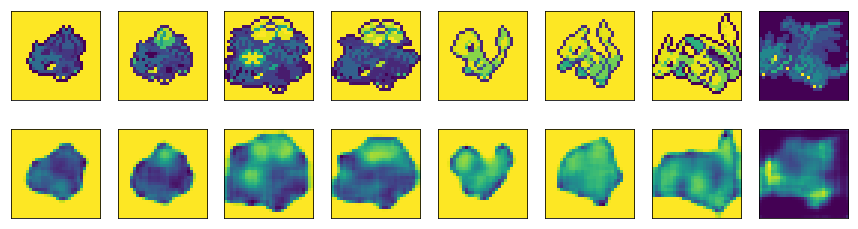

In [78]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)
n = 8  # how many digits we will display
plt.figure(figsize=(15, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    imgplot = plt.imshow(x_train[i,:,:,0])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    imgplot = plt.imshow(decoded_imgs[i,:,:,0])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()